The CIFAR10 dataset is hosted by the University of Toronto.
CIFAR-10 is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. 
The 10 classes in CIFAR-10 are:
Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck

While working in Colab or on Keras, it's preferable to use GPU/ TPU.

Importing the required libraries

In [81]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/parikh/anaconda3/lib/python3.11/site-packages
Requires: tensorflow-macos
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers

# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

## Load the data

In [59]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### look at the data types of variables

## Get the shape of the arrays

In [60]:
#print('x_train shape: ',#TODO)
#print('y_train shape: ',#TODO)
#print('x_test shape: ',#TODO)
#print('y_test shape: ',#TODO)

print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


Here, 50000 -> No. of images; 32x32 -> Resolution of each image in pixels ; 3 -> No. of channels(R,G,B)

Train = 50,000
Test = 10,000

In [61]:
#No. of classes
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [62]:
#Ran this code to check if this is a 'balanced' dataset where each class has similar number of values associated with it. 
np.unique(y_train,return_counts=True)
#If a certain class has less number of observations, then it is called an imbalanced dataset and our strategy to go ahead with certain ML problems change accordingly.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

## Take a look at the first image as an array

## Show the images as a picture

In [63]:
index = 0

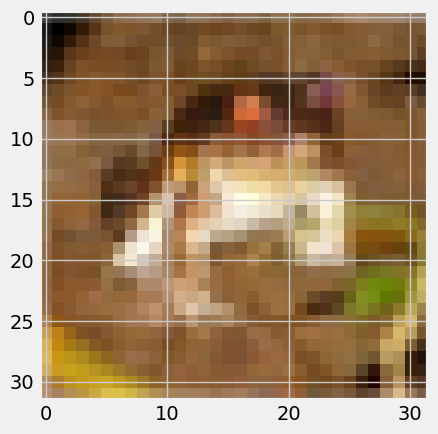

In [64]:
#Just plotting one of the images
img = plt.imshow(x_train[index])

## Get the image classification

In [65]:
classification = ['airplane', 'autombile','bird','cat','deer','dog','frog','horse','ship','truck']
#print the image class
print('The image class is :', classification[y_train[index][0]])

The image class is : frog


In [66]:
#In the below array, it's the 7th element
y_train[index]

array([6], dtype=uint8)

/Users/parikh/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


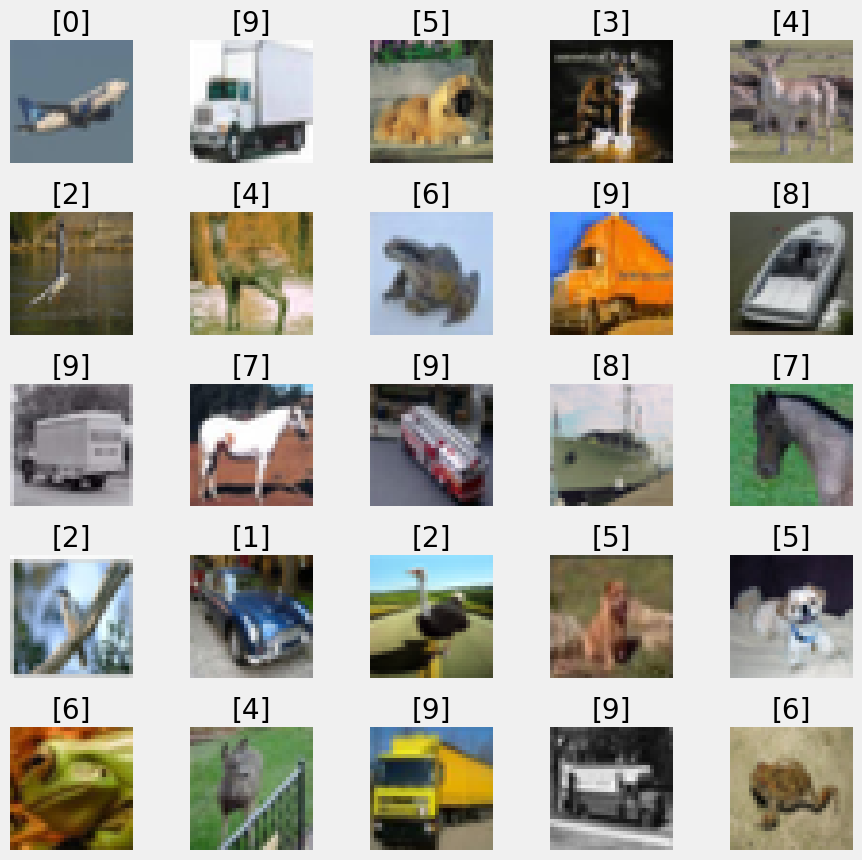

In [67]:
#Shows all the different images in the dataset
W_grid=5
L_grid=5
fig,axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in np.arange(0,L_grid * W_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Convert the label into a set of 10 numbers to input into the Neural Network

In [68]:
#Performing one-hot encoding as we have multiple classes
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [69]:
np.unique(y_train_one_hot)

array([0., 1.], dtype=float32)

In [70]:
y_train[index][0]

6

In [71]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Normalize the pixels to be values between 0 and 1

In [72]:
#x_train_normal = x_train / #TODO
#x_test_normal = x_test /#TODO

x_train_normal = x_train / 255
x_test_normal = x_test / 255

Max value of the array in the dataset for the denominator i.e. we use 255, as for images, each pixel value varies from 0 to 255. Therefore normalize pixels between these two.

## Create the models architecture

In [73]:
model = Sequential()
#Adding a sequential function to add all layers of the NN.

#add the first layer with filter size 32 and kernel of 5 X 5
# Use ReLu activation and include the input size of the image
#model.add(Conv2D(filter = #TODO,
 #   kernel_size = #TODO,
  #  activation=#TODO,
   # input_shape=#TODO))
                 
                 
model.add(Conv2D(32,
    kernel_size = (5,5), #kernel is 2D
    activation= 'relu',
    input_shape=(32,32,3)))
#Here, for the first layers it's going to be a convolution of 5x5 over 32x32x3 images and we're going to filter it 32 times.

#add a pooling layer of pool size of 2 X 2
#model.add(MaxPooling2D(pool_size=#TODO))
                 
model.add(MaxPooling2D(pool_size= (2,2)))

# Add another convolutiona layer of filter size 32 and kernel of 5 X 5 and activation of ReLU
#model.add(Conv2D(#TODO))
model.add(Conv2D(filters = 32,
    kernel_size = (5,5),
    activation= 'relu'))
    
#Add another pooling layer of 2 X 2
#model.add(MaxPooling2D(#TODO))
model.add(MaxPooling2D(pool_size=(2,2)))
    
# add a flatting layer
#model.add(#TODO)
model.add(Flatten())

# add a layer with 1000 neurons
#model.add(Dense(#TODO,activation='relu'))
model.add(Dense(1000,activation='relu'))
    
#Add a drop out layer of rate 0.5
# Hint: Dropout(rate = number)
#model.add(#TODO)
model.add(Dropout(0.5))
    
# add a layer with 500 neurons
#model.add(Dense(#TODO,activation='relu'))
model.add(Dense(500,activation='relu'))

#Add a drop out layer of rate 0.5
#model.add(Dropout(#TODO))
model.add(Dropout(0.5))
#Dropout :- While training the network, remove/switch off certain neurons in the network randomly at each epoch/each pass through. Randomly switch off and randomly switch on.
#0.5 - removing half of the neurons in each layer
#Dropout = regularization method to make the network more robust.
#Refer this for further explanation: https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

# add a layer with 250 neurons
#model.add(Dense(#TODO,activation='relu'))
model.add(Dense(250,activation='relu'))

# add a output layer
# Hint: Number of classes is number of output neurons
#model.add(Dense(#TODO ,activation='softmax'))
model.add(Dense(10,activation='softmax'))

#Since 10 classes, therefore 10 neurons in the output.

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 1000)             

## Compile the model

#Here were initialize the loss function, optimizer and the metric we use to decide on which NN to use.

Use the following
Loss function = Categorical cross Entropy Loss
Optimizer = ADAM
Metrics = Accuracy

Reference:


1.   https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class
2.   https://keras.io/api/optimizers/adam/
3.   https://keras.io/api/metrics/accuracy_metrics/



In [75]:
#model.compile(loss='#TODO', optimizer='#TODO', metrics=['#TODO'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [76]:
#Fit the model for 10 batches with a batch size of 256 and validation split of 0.2.

hist = model.fit(x_train_normal, y_train_one_hot,
                batch_size= 256,
                epochs= 10,
                validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 11s 65ms/step - loss: 1.8654 - accuracy: 0.2993 - val_loss: 1.5553 - val_accuracy: 0.4216
Epoch 2/10
157/157 [==============================] - 10s 66ms/step - loss: 1.5071 - accuracy: 0.4447 - val_loss: 1.4964 - val_accuracy: 0.4636
Epoch 3/10
157/157 [==============================] - 10s 66ms/step - loss: 1.3891 - accuracy: 0.4936 - val_loss: 1.2887 - val_accuracy: 0.5322
Epoch 4/10
157/157 [==============================] - 10s 66ms/step - loss: 1.2602 - accuracy: 0.5462 - val_loss: 1.2735 - val_accuracy: 0.5475
Epoch 5/10
157/157 [==============================] - 11s 68ms/step - loss: 1.1727 - accuracy: 0.5775 - val_loss: 1.2598 - val_accuracy: 0.5601
Epoch 6/10
157/157 [==============================] - 11s 68ms/step - loss: 1.0962 - accuracy: 0.6102 - val_loss: 1.0917 - val_accuracy: 0.6154
Epoch 7/10
157/157 [==============================] - 12s 76ms/step - loss: 1.0318 - accuracy: 0.6338 - val_loss: 1.0259 - val_accuracy:

# Evaluate the model using the test data set

In [77]:
model.evaluate(x_test_normal, y_test_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.9735 - accuracy: 0.6633


0.6632999777793884

# Visualize the model accuracy

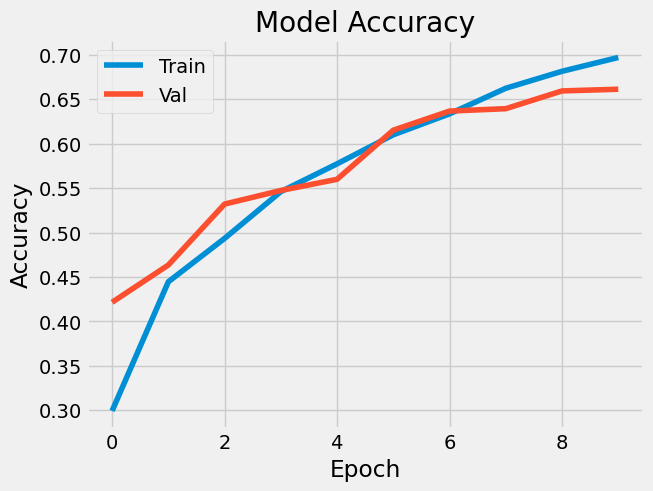

In [78]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc ='upper left')
plt.show()

# Visualize the model loss


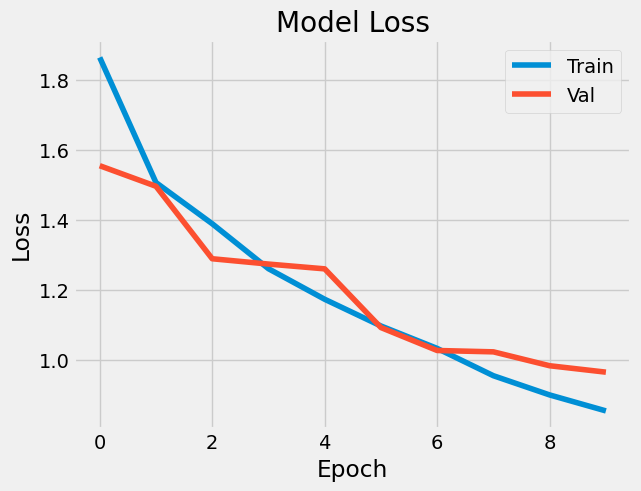

In [79]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc ='upper right')
plt.show()

In [80]:
#Initial conclusions on seeing the graphs: Probably run it through more epochs. Next, try starting with epochs = 50.

Reference: BUAN 6382.SW1.S24 course by Dr Farid Khafizov, at Naveen Jindal School to Management, UTDallas. Code along by the class's TA Harikrishna Dev.

Based on each epoch, no. of variables/ parameters being calculated are: 1457324 (from the summary)

With initial epochs=10, both validation and train test accuracy was increasing but when we increased the epochs=50, the train accuracy goes high but the validation accuracy halts, which is also due to overfitting where the model has been overfit to train data but the model is not robust hence it is unable to make predictions on the test data/ validation data.

As the epochs go on, the model is just updating weights & overfitting to the train data.

As there are "no transformations" included in the model, the train accuracy is going high but our validation accuracy has halted at 7. Transformation = randomly flipping/ rotating/ changing the colour etc. Can refer to 'Keras transformations' document for more information.

But the issue with transformation is that when we add more transformations, we add more noise to the training data. It might not converge fast.

The model has also overfit the data when we increased the number of epochs = 50, which is why training accuracy is increasing and validation accuracy has paused. The solution is to create more complicated architectures.